<a href="https://colab.research.google.com/github/thaizaloiola/fires-in-the-brazilian-pantanal/blob/main/fires-on-br-Pantanal-study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação Intermediária

## Nome: *informe seu nome aqui*

In [ ]:
Thaíza Loiola

# Sua tarefa: Avaliar focos de incêndio no Pantanal do Brasil em 2020.


Sua tarefa consiste em avaliar focos de incêndio no Brasil em 2020. O seguintes arquivo está disponível no Blackboard:

- Focos_2020-01-01_2020-12-31.shp - contém os focos de incêndio no Brasil em 2020.


Além desse arquivo, você vai precisar baixar a BCIM do IBGE. Execute o comando abaixo para isso:

In [ ]:
!wget https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg


--2021-11-04 00:16:07--  https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bcim/versao2016/geopackage/bcim_2016_21_11_2018.gpkg
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 372666368 (355M)
Saving to: ‘bcim_2016_21_11_2018.gpkg’

bcim_2016_21_11_201 100%[===================>] 355.40M  14.6MB/s    in 27s     

2021-11-04 00:16:34 (13.3 MB/s) - ‘bcim_2016_21_11_2018.gpkg’ saved [372666368/372666368]



1. Use o `fiona` para obter as layers e faça uso da layer `lim_pais_a` no `geopandas`. Filtre para que tenhamos dados apenas do Brasil (1 pto).

2. Importe o shapefile de incendios e plot tanto o mapa do Brasil (que você obteve no passo anterior, quanto o mapa dos focos de incêndio). Plote os pontos do foco de incêndio na cor `vermelha` (1 pto)

3. Carregue um novo geodataframe a partir da BCIM - IBGE, lendo a layer `lim_unidade_federacao_a`. Esse geodataframe vai ter todos os limites de nossos estados (1 pto)

4. Faça um mapa em que você plota os estados do Brasil, e os focos do incêndio. Faça um mapa temático a partir da coluna `bioma` (essa coluna está nos dados do foco de incêndio). (1 pto)

5. Filtre apenas os dados de incêndio do Bioma `Pantanal` e faça uma `junção espacial` para obter os estados que estão envolvidos nesse bioma. O seu resultado deve ser um mapa em que vamos conseguir ver os incêndios do `pantanal` projetados sob o mapa dos estados que compõem o pantanal brasileiro.  (1 pto)

6. Verifique se os arquivos estão nos sistemas de coordenadas correto para métricas de distância e apresente: (3 pontos)

    a. Centro médio dos incêndios no pantanal
    b. Quadrats dos incêndios no pantanal
    c. Função K de ripley dos focos de incêndio


A partir dos resultados obtidos, faça uma avaliação sobre a organização espacial dos focos de incêndio. Eles estão clusterizados? Justifique a sua resposta.


7. Questão obrigatória de resolução: faça  e resolva uma proposta de análise dos focos de incêndio. Pode ser um histograma por datas de incêndio, um mapa proporcional a alguma variável quantitativa da base que você possa fazer sentido. A ideia é que você use proponha e resolva uma análise sobre algo que possa ter te interessado ao olhar essa base.  (2 pontos)

In [ ]:
#1 Use o fiona para obter as layers e faça uso da layer lim_pais_a no geopandas. Filtre para que tenhamos dados apenas do Brasil (1 pto)


!pip install geopandas geopy rtree pygeos pointpats fiona --quiet

     |████████████████████████████████| 1.0 MB 7.9 MB/s 
     |████████████████████████████████| 994 kB 52.2 MB/s 
     |████████████████████████████████| 2.1 MB 38.3 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 6.3 MB 17.2 MB/s 
     |████████████████████████████████| 2.4 MB 57.6 MB/s 
     |████████████████████████████████| 66.5 MB 6.5 kB/s 


In [ ]:
import geopandas as gpd
import fiona as f
from pointpats import PointPattern
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
listaLayers =f.listlayers('bcim_2016_21_11_2018.gpkg')


In [ ]:
lim_pais_a = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer = 'lim_pais_a')
lim_pais_a.head(5)

,nome,nomeabrev,geometriaaproximada,sigla,codiso3166,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Colombia,None,None,None,COL,1000001,None,None,None,None,None,"MULTIPOLYGON (((-71.67359 12.45178, -71.65940 ..."
1,Trinidad and Tobago,None,None,None,TTO,1000001,None,None,None,None,None,"MULTIPOLYGON (((-60.93752 10.85745, -60.92352 ..."
2,Venezuela,None,None,None,VEN,1000001,None,None,None,None,None,"MULTIPOLYGON (((-61.25575 8.44683, -61.27406 8..."
3,Panamá,None,None,None,PAN,1000001,None,None,None,None,None,"MULTIPOLYGON (((-81.78940 7.27305, -81.79500 7..."
4,Guyana,None,None,None,GUY,1000001,None,None,None,None,None,"MULTIPOLYGON (((-58.57202 6.77709, -58.57796 6..."


In [ ]:
#filtrando os dados apenas do Brasil

lim_pais_aBr = lim_pais_a[lim_pais_a['nome'] == 'Brasil']

In [ ]:
lim_pais_aBr.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
lim_pais_aBrTESTE = lim_pais_aBr.set_crs('EPSG:31983', allow_override=True)

lim_pais_aBrTESTE.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
#2)Importe o shapefile de incendios e plot tanto o mapa do Brasil (que você obteve no passo anterior, quanto o mapa dos focos de incêndio).
#Plote os pontos do foco de incêndio na cor vermelha (1 pto)



In [ ]:
incendios = gpd.read_file('Focos_2020-01-01_2020-12-31.shp')
incendios.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuv,precipitac,riscofogo,latitude,longitude,frp,geometry
0,2020/09/28 16:05:00,AQUA_M-T,Brasil,MINAS GERAIS,GOVERNADOR VALADARES,Mata Atlantica,4.0,0.0,1.0,-18.870,-41.999,81.8,POINT (-41.99900 -18.87200)
1,2020/09/28 16:10:00,AQUA_M-T,Brasil,MARANHAO,AMARANTE DO MARANHAO,Amazonia,4.0,0.0,1.0,-5.319,-46.488,58.2,POINT (-46.48800 -5.31900)
2,2020/09/28 16:10:00,AQUA_M-T,Brasil,MARANHAO,LAGOA GRANDE DO MARANHAO,Cerrado,3.0,0.0,1.0,-5.033,-45.293,24.5,POINT (-45.29300 -5.03300)
3,2020/09/28 16:05:00,AQUA_M-T,Brasil,BAHIA,CANDIDO SALES,Mata Atlantica,5.0,0.0,1.0,-15.360,-41.211,137.7,POINT (-41.21100 -15.36500)
4,2020/09/28 16:10:00,AQUA_M-T,Brasil,PARA,AUGUSTO CORREA,Amazonia,48.0,4.5,0.4,-1.074,-46.625,34.6,POINT (-46.62500 -1.07400)


In [ ]:
incendios.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
incendiosTESTE = incendios.set_crs('EPSG:31983', allow_override=True)

In [ ]:
incendiosTESTE.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

[]

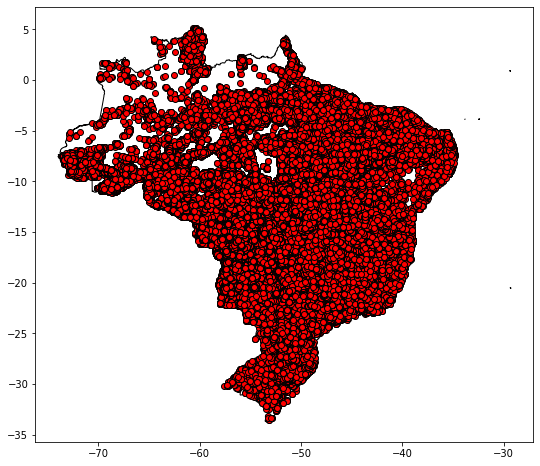

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
lim_pais_aBrTESTE.plot(ax = ax, color='white', edgecolor='k')
incendiosTESTE.plot(ax=ax, color='red', edgecolor='k')
plt.plot()

In [ ]:
#3) Carregue um novo geodataframe a partir da BCIM - IBGE, lendo a layer lim_unidade_federacao_a.
# Esse geodataframe vai ter todos os limites de nossos estados (1 pto)

In [ ]:
lim_unidade_federacao_a = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer = 'lim_unidade_federacao_a')

In [ ]:
lim_unidade_federacao_a.head(3)

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."


In [ ]:
#4)Faça um mapa em que você plota os estados do Brasil, e os focos do incêndio.
# Faça um mapa temático a partir da coluna bioma (essa coluna está nos dados do foco de incêndio). (1 pto)

In [ ]:
lim_unidade_federacao_aTESTE = lim_unidade_federacao_a.set_crs('EPSG:31983', allow_override=True)

[]

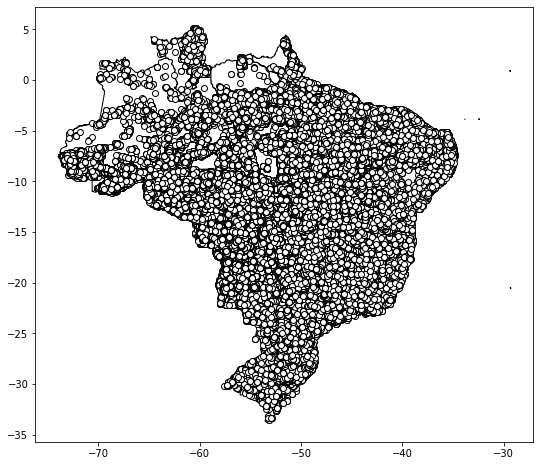

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
lim_unidade_federacao_aTESTE.plot(ax = ax, color='white', edgecolor='k')
incendiosTESTE.plot(ax=ax, color='white', edgecolor='k')
plt.plot()

In [ ]:
#mapa temático a partir da coluna bioma do geodataframe de incêndios

tiposBiomas = incendiosTESTE["bioma"].unique().tolist()

In [ ]:
tiposBiomas

['Mata Atlantica', 'Amazonia', 'Cerrado', 'Pantanal', 'Caatinga', 'Pampa']

In [ ]:
def get_bioma(bioma):
  if bioma =='Mata Atlantica':
    return "blue";
  if bioma == 'Amazonia':
    return "red"
  if bioma == 'Cerrado':
    return "purple"
  if bioma == 'Pantanal':
    return "green"
  if bioma == 'Caatinga':
    return "yellow"
  if bioma =='Pampa':
    return "silver"

In [ ]:
incendiosTESTE['cor'] = incendiosTESTE['bioma'].apply( lambda x : get_bioma(x))

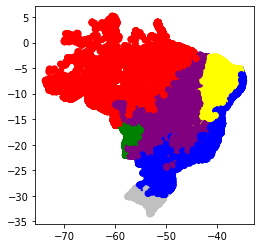

In [ ]:
incendiosTESTE.plot(color = incendiosTESTE['cor'])
plt.show()

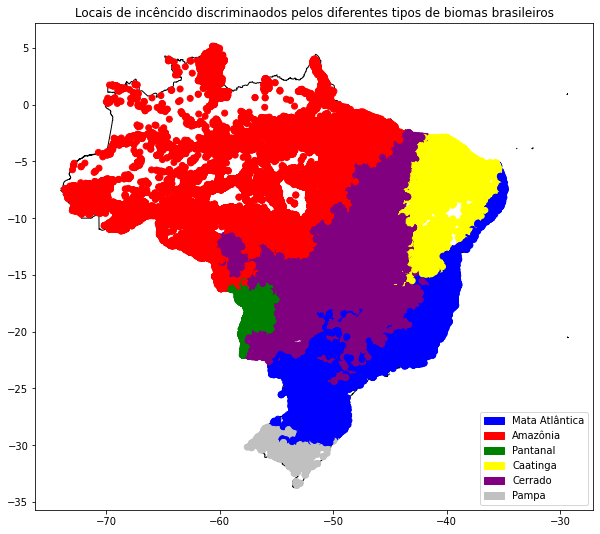

In [ ]:
import matplotlib.patches as mpatches


azul = mpatches.Patch(color='blue', label='Mata Atlântica')
vermelha = mpatches.Patch(color='red', label='Amazônia')
verde = mpatches.Patch(color='green', label='Pantanal')
amarela = mpatches.Patch(color='yellow', label='Caatinga')
lilas = mpatches.Patch(color='purple', label='Cerrado')
prata = mpatches.Patch(color='silver', label='Pampa')


fig, grafico = plt.subplots(figsize=(10,10))
lim_pais_aBrTESTE.plot(ax = grafico, color='white', edgecolor='black')
incendiosTESTE.plot(ax = grafico, color=incendiosTESTE['cor'])
plt.title('Locais de incêncido discriminaodos pelos diferentes tipos de biomas brasileiros')
plt.legend(handles=[azul, vermelha, verde, amarela, lilas, prata], loc='lower right')
plt.show()


In [ ]:
#5)Filtre apenas os dados de incêndio do Bioma Pantanal e faça uma junção espacial para obter os estados que estão envolvidos nesse bioma.
# O seu resultado deve ser um mapa em que vamos conseguir ver os incêndios do pantanal projetados sob o mapa dos estados que compõem o pantanal brasileiro. (1 pto

In [ ]:
# faz query pontos pantanal dentro de incendios

# sjoin(estados, esses pontos)

pntsPantanal = incendiosTESTE.query('bioma == "Pantanal"')



In [ ]:
dadosIncendioPantanal = gpd.sjoin(pntsPantanal, lim_unidade_federacao_aTESTE,  op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [ ]:
dadosIncendioPantanalPoly = gpd.sjoin(lim_unidade_federacao_aTESTE, pntsPantanal,  op='contains')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


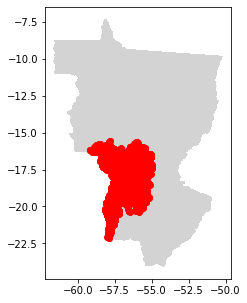

In [ ]:
ax = dadosIncendioPantanalPoly.plot(figsize=(10,5), color='lightgrey')
pntsPantanal.plot(ax=ax,color='red');

[]

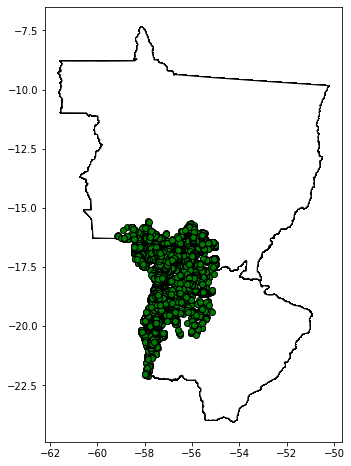

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
dadosIncendioPantanalPoly.plot(ax = ax, color='white', edgecolor='k')
pntsPantanal.plot(ax=ax, color='green', edgecolor='k')
plt.plot()

In [ ]:
#Verifique se os arquivos estão nos sistemas de coordenadas correto para métricas de distância e apresente: (3 pontos)

#a. Centro médio dos incêndios no pantanal b. Quadrats dos incêndios no pantanal c. Função K de ripley dos focos de incêndio

In [ ]:
x = pntsPantanal['geometry'].x
y = pntsPantanal['geometry'].y

In [ ]:
import numpy as np

In [ ]:
pontos = np.vstack((x, y)).T

In [ ]:
pp = PointPattern(pontos)

In [ ]:
from pointpats.centrography import mean_center, weighted_mean_center, std_distance, ellipse

In [ ]:
mc = mean_center(pp.points)

[]

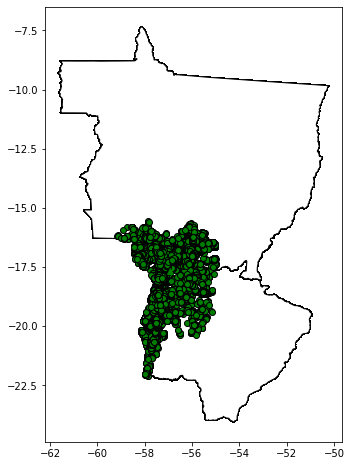

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
dadosIncendioPantanalPoly.plot(ax = ax, color='white', edgecolor='k')
pntsPantanal.plot(ax=ax, color='yellow', edgecolor='k')
plt.plot(mc[0], mc[1], 'g^', label='Mean Center')
plt.plot()

In [ ]:
import pointpats.quadrat_statistics as qs

In [ ]:
q_r = qs.QStatistic(pp, shape='rectangle', nx=3, ny=3)

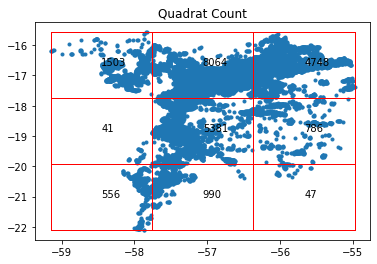

In [ ]:
q_r.plot()

In [ ]:
q_r.chi2

27000.93922951709

In [ ]:
q_r.chi2_pvalue

0.0

In [ ]:
from pointpats.distance_statistics import K
from pointpats import PoissonPointProcess

In [ ]:
kp = K(pp)

In [ ]:
kp.plot()
plt.legend()

In [ ]:
#Questão obrigatória de resolução: faça e resolva uma proposta de análise dos focos de incêndio.
#Pode ser um histograma por datas de incêndio, um mapa proporcional a alguma variável quantitativa da base que você possa fazer sentido.
#A ideia é que você use proponha e resolva uma análise sobre algo que possa ter te interessado ao olhar essa base. (2 pontos)

In [ ]:
#Professor, a minha RAM acabou bem na hora de fazer a análise de K de ripley. Então não tive como fazer a análise dos focos de incêndio aqui neste notebook.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import iqr
import matplotlib.pyplot as plt
from plotnine import *
from mizani.formatters import custom_format

%matplotlib inline

In [ ]:
pioresEstadosSobreChuva=incendios.value_counts('diasemchuv').to_frame("qtdEstados").reset_index().sort_values(by ='diasemchuv', ascending = False).reset_index()

In [ ]:
pioresEstadosSobreChuva2 = pioresEstadosSobreChuva.head(10)

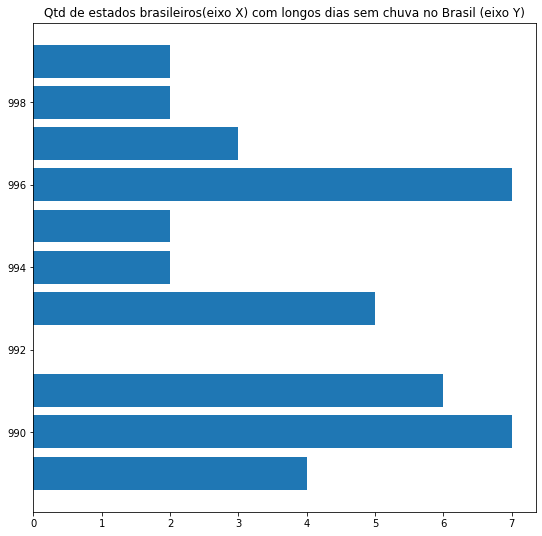

In [ ]:
# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(9,9)

# Create horizontal bars
ax.barh(y=pioresEstadosSobreChuva2['diasemchuv'], width=pioresEstadosSobreChuva2['qtdEstados']);
# Add title
ax.set_title("Qtd de estados brasileiros(eixo X) com longos dias sem chuva no Brasil (eixo Y)");

In [ ]:
#O gráfico acima pode ajudar a ver quantos estados do Brasil tem seus piores níves